## Load Packages and Data <a id="load-packages-and-data"></a>


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


<h5>Importing data<h5>

In [21]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

## Exploratory data analysis Load Packages and Data <a id="eda"></a>

In [22]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

no missing values

In [24]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Class
0    284315
1       492
Name: count, dtype: int64


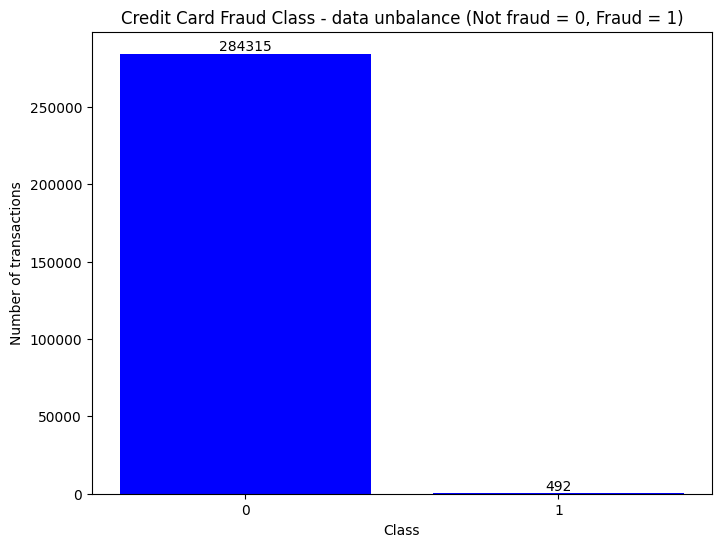

In [25]:
class_count = data["Class"].value_counts()
print(class_count)
class_count_df = pd.DataFrame({'Class': class_count.index, 'values': class_count.values})

plt.figure(figsize=(8, 6))
plt.bar(class_count_df['Class'], class_count_df['values'], color='blue')
plt.title('Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)')
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.xticks(class_count_df['Class'])
for i in range(len(class_count_df)):
    plt.text(class_count_df['Class'][i], class_count_df['values'][i], class_count_df['values'][i], ha='center', va='bottom')
plt.show()


We can see that the data is highly imbalanced with 28315 for class 0 and 492 for class 1

Let's split the data to fraud and not_fraud:

In [26]:
not_fraud = data.loc[data['Class'] == 0]
fraud = data.loc[data['Class'] == 1]

In [27]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [28]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

We can see there is a remarkable difference between the mean of the amount of fraud and not_fraud

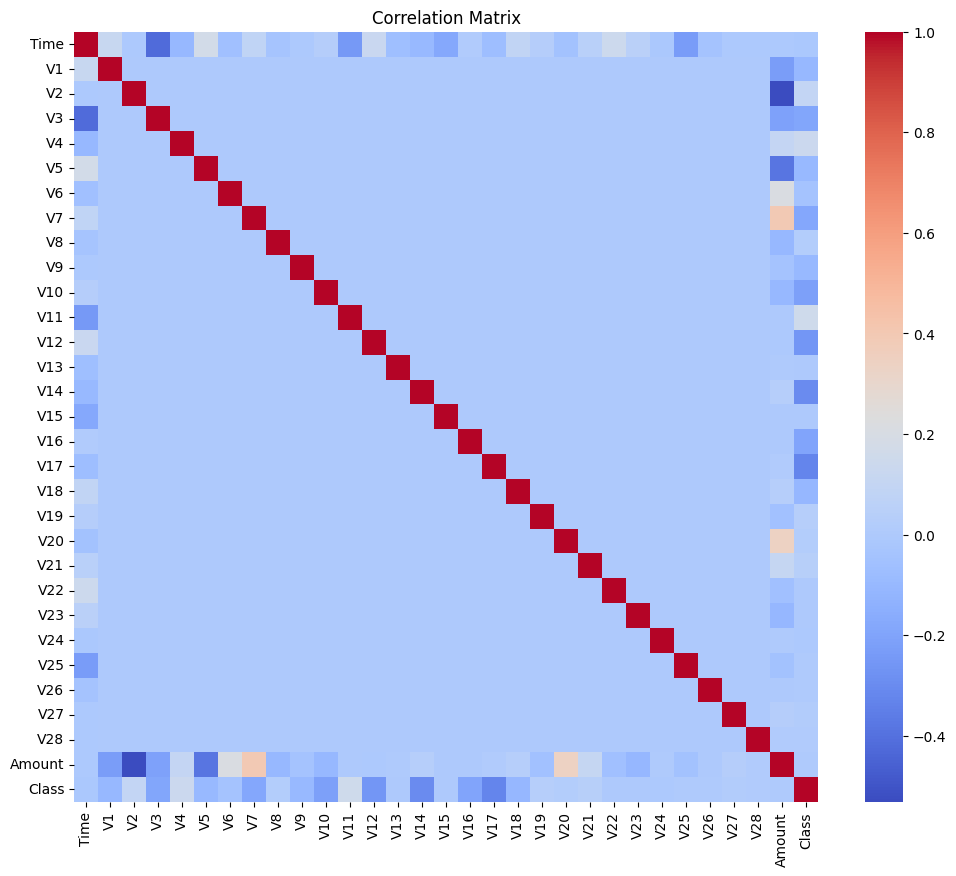

In [29]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


## Data Preprocessing <a id="data-preprocessing"></a>

<h4>Approach to solve unbalanced data</h4> 
Creating new sample dataset containing same distribution as normal transactions and fraudulent transactions

In [30]:
not_fraud_sample = not_fraud.sample(n=492)

In [31]:
new_dataset = pd.concat([not_fraud_sample, fraud], axis=0)

In [32]:
new_dataset.head()

Time        V1        V2        V3        V4        V5        V6  \
206321  136163.0  1.280933 -2.350648 -1.287226 -0.727651 -0.516933  1.374260   
218397  141300.0  0.041374  0.785466  0.242813 -0.587784  0.341200 -1.107147   
120111   75713.0 -0.044761  0.849728  1.339359  0.358344 -0.111190 -0.662021   
68765    53132.0 -2.303668 -0.377177  1.098149  0.863363 -1.034642 -0.091039   
40981    40486.0 -0.425839  1.000590  1.275113 -0.100067  0.226668 -0.195142   

              V7        V8        V9  ...       V21       V22       V23  \
206321 -0.590620  0.275830  0.084753  ...  0.086946 -0.511020  0.141933   
218397  0.959799 -0.151011  0.101878  ... -0.273203 -0.660597  0.082491   
120111  0.500074 -0.023356 -0.739302  ... -0.019080 -0.062731  0.201204   
68765  -0.581192  0.520816  0.798749  ...  0.037343  0.348631  0.033068   
40981   0.504205  0.238872 -0.587394  ... -0.189974 -0.501311  0.008353   

             V24       V25       V26       V27       V28  Amount  Class  
206321 -0.573131 -0.770159 -0.538012 -0.021962  0.020649  416.16      0  
218397 -0.057574 -0.511529  0.145161  0.239557  0.095041    6.99      0  
120111  0.533053 -1.279673 -0.030554  0.193123  0.211033    1.79      0  
68765   0.353695 -1.168707  0.124286 -0.955220 -0.378385   28.75      0  
40981  -0.046353 -0.279074  0.085847  0.255134  0.083632    3.87      0  

[5 rows x 31 columns]

Splitting the data into Features & Targets

In [33]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

## Model Training and Hyperparameter Tuning <a id=model-training-and-hyperparameter-tuning></a>

<h4> Set Up the Models and Hyperparameter Grids<h4>

Logistic Regression

In [35]:
log_reg = LogisticRegression(solver='liblinear') 
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2']  
}


Random Forest

In [36]:
rf = RandomForestClassifier()
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


AdaBoost

In [37]:
ada = AdaBoostClassifier()
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5]
}


CatBoost

In [38]:
cat = CatBoostClassifier(verbose=0)
cat_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}


xgb

In [39]:
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


lgbm

In [40]:
lgbm = LGBMClassifier()
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 40, 50],
    'boosting_type': ['gbdt', 'dart'],
    'max_depth': [-1, 10, 20]
}


<h4>Perform Hyperparameter Tuning</h4>

In [44]:
def grid_search(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=3, n_jobs=-1, scoring='roc_auc', verbose=2)
    grid_search.fit(X_train, Y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best ROC AUC for {model.__class__.__name__}: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Random Forest
best_rf = grid_search(rf, rf_param_grid)

# AdaBoost
best_ada = grid_search(ada, ada_param_grid)

# CatBoost
best_cat = grid_search(cat, cat_param_grid)

# XGBoost
best_xgb = grid_search(xgb_model, xgb_param_grid)

# LightGBM
best_lgbm = grid_search(lgbm, lgbm_param_grid)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; tota

## Evaluate the Best Models Load Packages and Data <a id="model-evaluation"></a>

In [45]:
models = {
    'Random Forest': best_rf,
    'AdaBoost': best_ada,
    'CatBoost': best_cat,
    'XGBoost': best_xgb,
    'LightGBM': best_lgbm
}

for name, model in models.items():
    Y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(Y_test, model.predict_proba(X_test)[:,1]):.4f}")
    print(classification_report(Y_test, Y_pred))


--- Random Forest ---
Accuracy: 0.9188
ROC AUC: 0.9704
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

--- AdaBoost ---
Accuracy: 0.9137
ROC AUC: 0.9625
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        99
           1       0.99      0.84      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

--- CatBoost ---
Accuracy: 0.9086
ROC AUC: 0.9736
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        99
           1       0.94      0.87      0.90        98

    accuracy               

## Conclusion <a id="conclusion"></a>

In this notebook, we explored the problem of credit card fraud detection using several machine learning models, including Random Forest, AdaBoost, CatBoost, XGBoost, LightGBM, and Logistic Regression. Our objective was to identify the best model for detecting fraudulent transactions with high accuracy and robustness.

## Key Findings:

### Random Forest:
- **Accuracy**: 0.9188
- **ROC AUC**: 0.9704
- **Precision, Recall, F1-Score**:
  - **Class 0 (Not Fraud)**: Precision = 0.89, Recall = 0.96, F1-Score = 0.92
  - **Class 1 (Fraud)**: Precision = 0.96, Recall = 0.88, F1-Score = 0.91

### AdaBoost:
- **Accuracy**: 0.9137
- **ROC AUC**: 0.9625
- **Precision, Recall, F1-Score**:
  - **Class 0 (Not Fraud)**: Precision = 0.86, Recall = 0.99, F1-Score = 0.92
  - **Class 1 (Fraud)**: Precision = 0.99, Recall = 0.84, F1-Score = 0.91

### CatBoost:
- **Accuracy**: 0.9086
- **ROC AUC**: 0.9736
- **Precision, Recall, F1-Score**:
  - **Class 0 (Not Fraud)**: Precision = 0.88, Recall = 0.95, F1-Score = 0.91
  - **Class 1 (Fraud)**: Precision = 0.94, Recall = 0.87, F1-Score = 0.90

### XGBoost:
- **Accuracy**: 0.9188
- **ROC AUC**: 0.9727
- **Precision, Recall, F1-Score**:
  - **Class 0 (Not Fraud)**: Precision = 0.88, Recall = 0.97, F1-Score = 0.92
  - **Class 1 (Fraud)**: Precision = 0.97, Recall = 0.87, F1-Score = 0.91

### LightGBM:
- **Accuracy**: 0.9188
- **ROC AUC**: 0.9746
- **Precision, Recall, F1-Score**:
  - **Class 0 (Not Fraud)**: Precision = 0.88, Recall = 0.97, F1-Score = 0.92
  - **Class 1 (Fraud)**: Precision = 0.97, Recall = 0.87, F1-Score = 0.91

## Summary

Based on our evaluation metrics, **LightGBM** emerged as the best model for detecting credit card fraud. It achieved the highest ROC AUC score of **0.9746**, indicating a strong ability to distinguish between fraudulent and non-fraudulent transactions. Additionally, LightGBM, along with Random Forest and XGBoost, provided the highest accuracy of **0.9188**.

Each model demonstrated robust performance with slight variations in precision, recall, and F1-score. These metrics are crucial for understanding the trade-offs between identifying fraudulent transactions and minimizing false positives.
